![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [54]:
df=pd.read_csv(r'C:\Users\Fernando\Documents\Data science\M6\M6\Proyecto_Integrador\Propuesta 1\hospitalizacion_CSV')
df

,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACI�N INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,HOSPITALIZACION
0,1,1,0,0,0,1
1,1,1,0,0,0,1
2,1,1,0,1,1,1
3,1,1,0,0,0,1
4,1,1,0,1,1,1
...,...,...,...,...,...,...
536,0,0,0,0,0,0
537,0,0,0,0,0,0
538,0,0,0,0,0,0
539,0,0,0,0,0,0


Separen el dataset en X, y (variable objetivo)

In [55]:
X=df.drop('HOSPITALIZACION',axis=1)
y=df['HOSPITALIZACION'] #creamos las variables

In [56]:
X

,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACI�N INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO
0,1,1,0,0,0
1,1,1,0,0,0
2,1,1,0,1,1
3,1,1,0,0,0
4,1,1,0,1,1
...,...,...,...,...,...
536,0,0,0,0,0
537,0,0,0,0,0
538,0,0,0,0,0
539,0,0,0,0,0


In [57]:
y

0      1
1      1
2      1
3      1
4      1
      ..
536    0
537    0
538    0
539    0
540    0
Name: HOSPITALIZACION, Length: 541, dtype: int64

Separen el dataset en X_train, X_test, y_train y y_test

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.75,random_state=0) #separamos el dataset

In [59]:
X_train.shape
X_test.shape #vemos que haya salido la forma correcta

(136, 5)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [60]:
from sklearn.tree import DecisionTreeClassifier
arbol=DecisionTreeClassifier(max_depth=5) #importamos e instanciamos

In [61]:
arbol.fit(X_train,y_train) #entrenamos el arbol


DecisionTreeClassifier(max_depth=5)

In [62]:
y_pred_test=arbol.predict(X_test) #predecimos
y_pred_train=arbol.predict(X_train)

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [63]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, classification_report,confusion_matrix
print(f'F1 Score de test: {f1_score(y_test,y_pred_test)}') #media armonica
print(f'Accuracy score de test: {accuracy_score(y_test,y_pred_test)}') #relacion de las predicciones correctas entre las predicciones totales
print(f'Precision Score de test: {precision_score(y_test,y_pred_test)}') #relaccion de las variables verdaderas entre las predicciones clasificadas como verdaderas

F1 Score de test: 1.0
Accuracy score de test: 1.0
Precision Score de test: 1.0


In [64]:
print(f'F1 Score de train: {f1_score(y_train,y_pred_train)}')
print(f'Accuracy score de train: {accuracy_score(y_train,y_pred_train)}')
print(f'Precision Score de train: {precision_score(y_train,y_pred_train)}')

F1 Score de train: 1.0
Accuracy score de train: 1.0
Precision Score de train: 1.0


In [65]:
report=classification_report(y_test,y_pred_test)
print(report) #reporte completo

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00         7

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



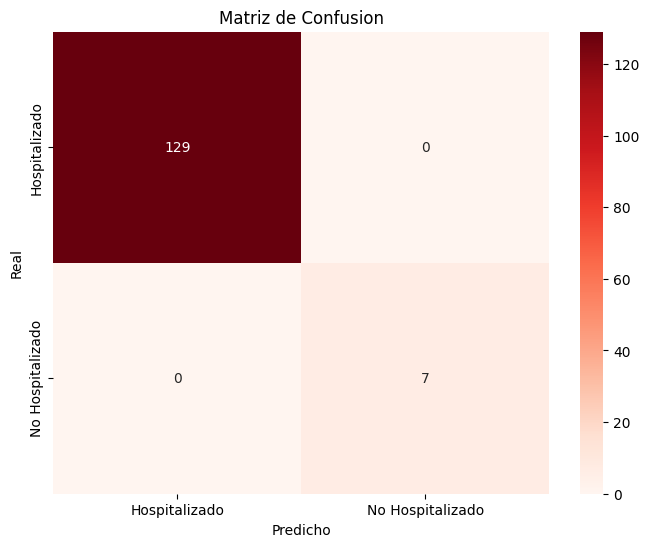

In [66]:
cm=confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Hospitalizado', 'No Hospitalizado'], yticklabels=['Hospitalizado', 'No Hospitalizado'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusion')
plt.show()


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

In [70]:
from sklearn.feature_selection import SelectKBest,chi2
skb=SelectKBest(chi2,k=5)
skb.fit(X,y)

SelectKBest(k=5, score_func=<function chi2 at 0x000001B8C54D13A0>)

In [86]:
importancia=skb.scores_
print(skb.feature_names_in_)
importancia=pd.DataFrame(importancia,index=skb.feature_names_in_ )
importancia

['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACI�N INFECCIOSA'
 'FIEBRE' 'ITU' 'TIPO DE CULTIVO' 'AGENTE AISLADO']


,0
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACI�N INFECCIOSA,906.337630
FIEBRE,232.779512
ITU,135.130435
TIPO DE CULTIVO,405.391304
AGENTE AISLADO,225.217391


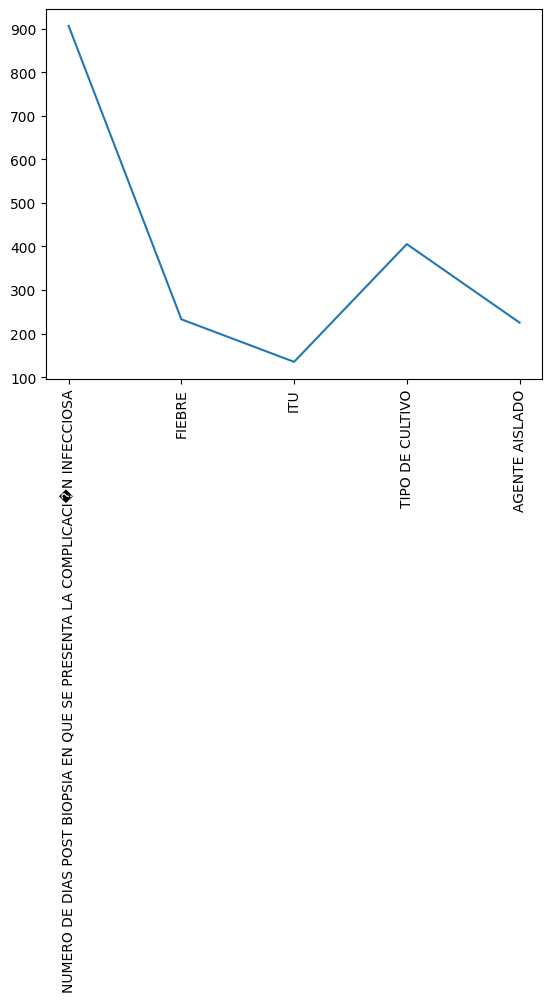

In [100]:
fig,ax=plt.subplots()
ax.plot(importancia)
plt.xticks(rotation=90)
plt.show()

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [101]:
from sklearn.model_selection import GridSearchCV 
param_grid={'max_depth':[2,3,4,5,6,7,8]}# valores de los max_depth
t=DecisionTreeClassifier() #nuevo modelo


In [102]:
model=GridSearchCV(t,param_grid=param_grid,cv=5)#GRid search

In [104]:
model.fit(X_train,y_train) #entrenamos

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8]})

In [107]:
y_pred=model.predict(X_test)


In [111]:
print(model.best_params_)
model.best_score_ #da el mismo score que con 5 pero seria mas eficiente

{'max_depth': 2}


1.0

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [116]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)

In [117]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [118]:
y_pred_test=knn.predict(X_test)

In [120]:
report=classification_report(y_test,y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00         7

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



Encuentre el valor óptimo para k

In [128]:
param_grid={'n_neighbors':[2,3,4,5,6,7,8,9,10]}
knn=KNeighborsClassifier() #isntanciamos modelo y grilla

In [129]:
model=GridSearchCV(knn,param_grid=param_grid) #creamos el nuevo modelo

In [130]:
model.fit(X_train,y_train) #entrenamos y predecimos
y_pred_test=model.predict(X_test)

In [131]:
model.best_params_ # mejores parametros

{'n_neighbors': 2}

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [136]:
report=classification_report(y_test,y_test)
print(report) #ambos modelos tuvieron una muy buena precision con los parametros en un numero muy eficiente

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00         7

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/